In [ ]:
####  https://cloudxlab.com/blog/object-detection-yolo-and-python-pydarknet/

Gus Marquez IS687

Captain's OpenCV Object Detection in Video

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES

In [1]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import time
import cv2
import imutils
from imutils.video import FPS
from imutils.video import VideoStream



INPUT_FILE='/content/drive/MyDrive/colab/traffictiny.mp4'
OUTPUT_FILE='output.avi'
LABELS_FILE='/content/drive/MyDrive/colab/coco.names'
CONFIG_FILE='/content/drive/MyDrive/colab/yolov3.cfg'
WEIGHTS_FILE='/content/drive/MyDrive/colab/yolov3.weights'
CONFIDENCE_THRESHOLD=0.3

H=None
W=None

fps = FPS().start()

fourcc = cv2.VideoWriter_fourcc(*"MJPG")
writer = cv2.VideoWriter(OUTPUT_FILE, fourcc, 30,
	(800, 600), True)

LABELS = open(LABELS_FILE).read().strip().split("\n")

np.random.seed(4)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")


net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

vs = cv2.VideoCapture(INPUT_FILE)


# determine only the *output* layer names that we need from YOLO
#ln = net.getLayerNames()
ln = [layer_name for layer_name in net.getUnconnectedOutLayersNames()]
	




cnt =0;
while True:
	cnt+=1
	print ("Frame number", cnt)
	try:
		(grabbed, image) = vs.read()
	except:
		break
	blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
		swapRB=True, crop=False)
 
	net.setInput(blob)
	if W is None or H is None:
		(H, W) = image.shape[:2]
	layerOutputs = net.forward(ln)

	if cnt == 100:
		break






	# initialize our lists of detected bounding boxes, confidences, and
	# class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []
	carcc = 0
	carconf = 0
	personcc = 0
	personconf = 0
	motorbikecc = 0
	motorbikeconf = 0
	truckcc = 0
	truckconf = 0
	FRAMENUM = 0
	#ArrayItemsConf[100][100]

	# loop over each of the layer outputs
	for output in layerOutputs:
		print("OUTPUT >>>>>> ", output)
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability) of
			# the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]

			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > CONFIDENCE_THRESHOLD:
				# scale the bounding box coordinates back relative to the
				# size of the image, keeping in mind that YOLO actually
				# returns the center (x, y)-coordinates of the bounding
				# box followed by the boxes' width and height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")

				# use the center (x, y)-coordinates to derive the top and
				# and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))

				# update our list of bounding box coordinates, confidences,
				# and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)

	# apply non-maxima suppression to suppress weak, overlapping bounding
	# boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,
		CONFIDENCE_THRESHOLD)


	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			FRAMENUM = FRAMENUM + 1
			print("FRAMENUM = :", FRAMENUM)
			print("IIIIIIIIIII", i)
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])


			color = [int(c) for c in COLORS[classIDs[i]]]

			cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])

			cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
				0.5, color, 2)
			print("TEXT = " , text)

			print("This frame", LABELS[classIDs[i]], confidences[i])
			if LABELS[classIDs[i]] == "car":
				carcc = carcc + 1
				carconf = carconf + confidences[i]
				#personcc = personcc + 1
				#per
				#carconf = carconf + LABELS[,confidences[i]]
				#print(LABELS[:confidences[i]])
				#print(type(LABELS))
			#if LABELS[classIDs[i]] == "car":
				#carcc = carcc + 1
				#carconf = carconf + confidences[i]

			if LABELS[classIDs[i]] == "person":
				personcc = personcc + 1
				personconf = personconf + confidences[i]
				#personcc = personcc + 1
				#per
				#carconf = carconf + LABELS[,confidences[i]]
				#print(LABELS[:confidences[i]])
				#print(type(LABELS))
			#if LABELS[classIDs[i]] == "car":
				#carcc = carcc + 1
				#carconf = carconf + confidences[i]

			if LABELS[classIDs[i]] == "motorbike":
				motorbikecc = motorbikecc + 1
				motorbikeconf = motorbikeconf + confidences[i]
				#personcc = personcc + 1
				#per
				#carconf = carconf + LABELS[,confidences[i]]
				#print(LABELS[:confidences[i]])
				#print(type(LABELS))
			#if LABELS[classIDs[i]] == "car":
				#carcc = carcc + 1
				#carconf = carconf + confidences[i]

			if LABELS[classIDs[i]] == "truck":
				truckcc = truckcc + 1
				truckconf = truckconf + confidences[i]
				#personcc = personcc + 1
				#per
				#carconf = carconf + LABELS[,confidences[i]]
				#print(LABELS[:confidences[i]])
				print(type(LABELS))
			#if LABELS[classIDs[i]] == "car":
				#carcc = carcc + 1
				#carconf = carconf + confidences[i]

			print("Cars = ", carcc, " Confidences = ", carconf)
			print("CONF = ", confidences[i])

			print("Persons = ", personcc, " Confidences = ", personconf)
			print("CONF = ", confidences[i])
	 
			print("Motorbikes = ", motorbikecc, " Confidences = ", motorbikeconf)
			print("CONF = ", confidences[i])

			print("Persons = ", truckcc, " Confidences = ", truckconf)
			print("CONF = ", confidences[i])
	 
	    

	# show the output image
	#cv2.imshow(cv2.resize(image,(800, 600)))
	writer.write(cv2.resize(image,(800, 600)))
	fps.update()
	key = cv2.waitKey(1) & 0xFF
	if key == ord("q"):
		break

fps.stop()

print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

print("Cars = ", carcc, " Confidences = ", carconf, " Cars average confidence = " , carconf/carcc)

print("Persons = ", personcc, " Confidences = ", personconf, " Persons average confidence = " , personconf/personcc)

print("Motorbikes = ", motorbikecc, " Confidences = ", motorbikeconf, " Motobikes average confidence = " , motorbikeconf/motorbikecc)

print("Trucks = ", truckcc, " Confidences = ", truckconf, " Trucks average confidence = " , truckconf/truckcc)

# do a bit of cleanup
cv2.destroyAllWindows()

# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

Streaming output truncated to the last 5000 lines.
This frame car 0.6869407296180725
Cars =  9  Confidences =  8.421694278717041
CONF =  0.6869407296180725
Persons =  6  Confidences =  5.2902712225914
CONF =  0.6869407296180725
Motorbikes =  5  Confidences =  4.569324016571045
CONF =  0.6869407296180725
Persons =  0  Confidences =  0
CONF =  0.6869407296180725
FRAMENUM = : 21
IIIIIIIIIII 11
TEXT =  car: 0.6252
This frame car 0.6252033114433289
Cars =  10  Confidences =  9.04689759016037
CONF =  0.6252033114433289
Persons =  6  Confidences =  5.2902712225914
CONF =  0.6252033114433289
Motorbikes =  5  Confidences =  4.569324016571045
CONF =  0.6252033114433289
Persons =  0  Confidences =  0
CONF =  0.6252033114433289
FRAMENUM = : 22
IIIIIIIIIII 81
TEXT =  car: 0.4363
This frame car 0.43626633286476135
Cars =  11  Confidences =  9.483163923025131
CONF =  0.43626633286476135
Persons =  6  Confidences =  5.2902712225914
CONF =  0.43626633286476135
Motorbikes =  5  Confidences =  4.56932401

{'Cars': 0.9257023280317133, 'Persons': 0.7299044243991375, 'Motobikes': 0.8719002366065979, 'Trucks': 0.667946994304657}



<BarContainer object of 4 artists>

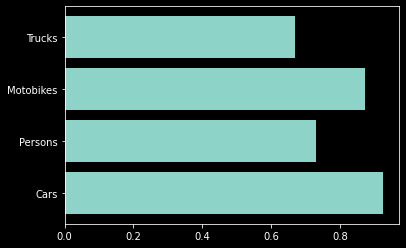

In [4]:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

xkeys = ['Cars', 'Persons', 'Motobikes', 'Trucks']
xvalues = [carconf/carcc, personconf/personcc, motorbikeconf/motorbikecc, truckconf, truckcc]
xd = dict(zip(xkeys, xvalues))
print(xd)
print()



group_data = list(xd.values())
group_names = list(xd.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots()
ax.barh(group_names, group_data)